In [1]:
!pip install tensorflow

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# imports

In [1]:
# data manipulation and visualization libraries
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# cnn supporting libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [3]:
# resnet supporting libraries
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.utils import to_categorical

In [48]:
!pip freeze > requirements.txt

# preprocess the images

In [4]:
def preprocess_data(image_path):
    # load image using cv2
    image_bgr = cv2.imread(image_path)
    # convert image from bgr to rgb
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    # resize image to make each same size
    resized_image = cv2.resize(image_rgb, (64, 64))
    return resized_image

In [5]:
# defining directory where all images are stored
main_directory = 'bone_marrow_cell_dataset'

# list of 21 types of cells
# labels = ['ABE', 'ART', 'BAS', 'BLA', 'EBO', 'EOS', 'FGC', 'HAC', 'KSC', 'LYI', 'LYT', 'MMZ', 'MON', 'MYB', 'NGB', 'NGS', 'NIF', 'OTH', 'PEB', 'PLM', 'PMO']
labels = ['EBO', 'EOS', 'LYT', 'MON', 'NGB', 'PLM']
i = 1
images_list = []
cell_types_list = []

In [6]:
i = 1
# reading and preprocessing images
for label in labels:
    folder_path = os.path.join(main_directory, label)   # folder path 
    if os.path.exists(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)  # file path
            if os.path.isdir(file_path): 
                for img_filename in os.listdir(file_path):
                    if img_filename.endswith('.jpg'):
                        row_img_path = os.path.join(file_path, img_filename)  # image path
                        img_path = "/".join(row_img_path.split("\\"))
                        images_list.append(preprocess_data(img_path))
                        cell_types_list.append(label)
                        print(i, "done", img_path)
                        i+=1

1 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00001.jpg
2 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00002.jpg
3 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00003.jpg
4 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00004.jpg
5 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00005.jpg
6 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00006.jpg
7 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00007.jpg
8 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00008.jpg
9 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00009.jpg
10 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00010.jpg
11 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00011.jpg
12 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00012.jpg
13 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00013.jpg
14 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00014.jpg
15 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00015.jpg
16 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00016.jpg
17 done bone_marrow_cell_dataset/

135 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00135.jpg
136 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00136.jpg
137 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00137.jpg
138 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00138.jpg
139 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00139.jpg
140 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00140.jpg
141 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00141.jpg
142 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00142.jpg
143 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00143.jpg
144 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00144.jpg
145 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00145.jpg
146 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00146.jpg
147 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00147.jpg
148 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00148.jpg
149 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00149.jpg
150 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00150.jpg
151 done

331 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00331.jpg
332 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00332.jpg
333 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00333.jpg
334 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00334.jpg
335 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00335.jpg
336 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00336.jpg
337 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00337.jpg
338 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00338.jpg
339 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00339.jpg
340 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00340.jpg
341 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00341.jpg
342 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00342.jpg
343 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00343.jpg
344 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00344.jpg
345 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00345.jpg
346 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00346.jpg
347 done

498 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00498.jpg
499 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00499.jpg
500 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00500.jpg
501 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00501.jpg
502 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00502.jpg
503 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00503.jpg
504 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00504.jpg
505 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00505.jpg
506 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00506.jpg
507 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00507.jpg
508 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00508.jpg
509 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00509.jpg
510 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00510.jpg
511 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00511.jpg
512 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00512.jpg
513 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00513.jpg
514 done

668 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00668.jpg
669 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00669.jpg
670 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00670.jpg
671 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00671.jpg
672 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00672.jpg
673 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00673.jpg
674 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00674.jpg
675 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00675.jpg
676 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00676.jpg
677 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00677.jpg
678 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00678.jpg
679 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00679.jpg
680 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00680.jpg
681 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00681.jpg
682 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00682.jpg
683 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00683.jpg
684 done

824 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00824.jpg
825 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00825.jpg
826 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00826.jpg
827 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00827.jpg
828 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00828.jpg
829 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00829.jpg
830 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00830.jpg
831 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00831.jpg
832 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00832.jpg
833 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00833.jpg
834 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00834.jpg
835 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00835.jpg
836 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00836.jpg
837 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00837.jpg
838 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00838.jpg
839 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00839.jpg
840 done

981 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00981.jpg
982 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00982.jpg
983 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00983.jpg
984 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00984.jpg
985 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00985.jpg
986 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00986.jpg
987 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00987.jpg
988 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00988.jpg
989 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00989.jpg
990 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00990.jpg
991 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00991.jpg
992 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00992.jpg
993 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00993.jpg
994 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00994.jpg
995 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00995.jpg
996 done bone_marrow_cell_dataset/EBO/0001-1000/EBO_00996.jpg
997 done

1151 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01151.jpg
1152 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01152.jpg
1153 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01153.jpg
1154 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01154.jpg
1155 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01155.jpg
1156 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01156.jpg
1157 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01157.jpg
1158 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01158.jpg
1159 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01159.jpg
1160 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01160.jpg
1161 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01161.jpg
1162 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01162.jpg
1163 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01163.jpg
1164 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01164.jpg
1165 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01165.jpg
1166 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01

1327 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01327.jpg
1328 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01328.jpg
1329 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01329.jpg
1330 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01330.jpg
1331 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01331.jpg
1332 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01332.jpg
1333 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01333.jpg
1334 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01334.jpg
1335 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01335.jpg
1336 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01336.jpg
1337 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01337.jpg
1338 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01338.jpg
1339 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01339.jpg
1340 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01340.jpg
1341 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01341.jpg
1342 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01

1496 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01496.jpg
1497 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01497.jpg
1498 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01498.jpg
1499 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01499.jpg
1500 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01500.jpg
1501 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01501.jpg
1502 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01502.jpg
1503 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01503.jpg
1504 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01504.jpg
1505 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01505.jpg
1506 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01506.jpg
1507 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01507.jpg
1508 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01508.jpg
1509 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01509.jpg
1510 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01510.jpg
1511 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01

1671 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01671.jpg
1672 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01672.jpg
1673 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01673.jpg
1674 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01674.jpg
1675 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01675.jpg
1676 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01676.jpg
1677 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01677.jpg
1678 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01678.jpg
1679 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01679.jpg
1680 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01680.jpg
1681 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01681.jpg
1682 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01682.jpg
1683 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01683.jpg
1684 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01684.jpg
1685 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01685.jpg
1686 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01

1845 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01845.jpg
1846 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01846.jpg
1847 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01847.jpg
1848 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01848.jpg
1849 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01849.jpg
1850 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01850.jpg
1851 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01851.jpg
1852 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01852.jpg
1853 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01853.jpg
1854 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01854.jpg
1855 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01855.jpg
1856 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01856.jpg
1857 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01857.jpg
1858 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01858.jpg
1859 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01859.jpg
1860 done bone_marrow_cell_dataset/EBO/1001-2000/EBO_01

2029 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02029.jpg
2030 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02030.jpg
2031 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02031.jpg
2032 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02032.jpg
2033 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02033.jpg
2034 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02034.jpg
2035 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02035.jpg
2036 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02036.jpg
2037 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02037.jpg
2038 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02038.jpg
2039 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02039.jpg
2040 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02040.jpg
2041 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02041.jpg
2042 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02042.jpg
2043 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02043.jpg
2044 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02

2211 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02211.jpg
2212 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02212.jpg
2213 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02213.jpg
2214 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02214.jpg
2215 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02215.jpg
2216 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02216.jpg
2217 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02217.jpg
2218 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02218.jpg
2219 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02219.jpg
2220 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02220.jpg
2221 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02221.jpg
2222 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02222.jpg
2223 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02223.jpg
2224 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02224.jpg
2225 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02225.jpg
2226 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02

2388 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02388.jpg
2389 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02389.jpg
2390 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02390.jpg
2391 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02391.jpg
2392 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02392.jpg
2393 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02393.jpg
2394 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02394.jpg
2395 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02395.jpg
2396 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02396.jpg
2397 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02397.jpg
2398 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02398.jpg
2399 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02399.jpg
2400 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02400.jpg
2401 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02401.jpg
2402 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02402.jpg
2403 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02

2551 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02551.jpg
2552 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02552.jpg
2553 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02553.jpg
2554 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02554.jpg
2555 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02555.jpg
2556 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02556.jpg
2557 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02557.jpg
2558 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02558.jpg
2559 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02559.jpg
2560 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02560.jpg
2561 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02561.jpg
2562 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02562.jpg
2563 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02563.jpg
2564 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02564.jpg
2565 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02565.jpg
2566 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02

2722 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02722.jpg
2723 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02723.jpg
2724 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02724.jpg
2725 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02725.jpg
2726 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02726.jpg
2727 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02727.jpg
2728 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02728.jpg
2729 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02729.jpg
2730 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02730.jpg
2731 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02731.jpg
2732 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02732.jpg
2733 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02733.jpg
2734 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02734.jpg
2735 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02735.jpg
2736 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02736.jpg
2737 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02

2879 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02879.jpg
2880 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02880.jpg
2881 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02881.jpg
2882 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02882.jpg
2883 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02883.jpg
2884 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02884.jpg
2885 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02885.jpg
2886 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02886.jpg
2887 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02887.jpg
2888 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02888.jpg
2889 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02889.jpg
2890 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02890.jpg
2891 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02891.jpg
2892 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02892.jpg
2893 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02893.jpg
2894 done bone_marrow_cell_dataset/EBO/2001-3000/EBO_02

3035 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00035.jpg
3036 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00036.jpg
3037 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00037.jpg
3038 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00038.jpg
3039 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00039.jpg
3040 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00040.jpg
3041 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00041.jpg
3042 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00042.jpg
3043 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00043.jpg
3044 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00044.jpg
3045 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00045.jpg
3046 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00046.jpg
3047 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00047.jpg
3048 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00048.jpg
3049 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00049.jpg
3050 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00

3185 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00185.jpg
3186 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00186.jpg
3187 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00187.jpg
3188 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00188.jpg
3189 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00189.jpg
3190 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00190.jpg
3191 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00191.jpg
3192 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00192.jpg
3193 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00193.jpg
3194 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00194.jpg
3195 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00195.jpg
3196 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00196.jpg
3197 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00197.jpg
3198 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00198.jpg
3199 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00199.jpg
3200 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00

3364 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00364.jpg
3365 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00365.jpg
3366 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00366.jpg
3367 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00367.jpg
3368 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00368.jpg
3369 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00369.jpg
3370 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00370.jpg
3371 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00371.jpg
3372 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00372.jpg
3373 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00373.jpg
3374 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00374.jpg
3375 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00375.jpg
3376 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00376.jpg
3377 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00377.jpg
3378 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00378.jpg
3379 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00

3534 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00534.jpg
3535 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00535.jpg
3536 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00536.jpg
3537 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00537.jpg
3538 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00538.jpg
3539 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00539.jpg
3540 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00540.jpg
3541 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00541.jpg
3542 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00542.jpg
3543 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00543.jpg
3544 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00544.jpg
3545 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00545.jpg
3546 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00546.jpg
3547 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00547.jpg
3548 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00548.jpg
3549 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00

3692 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00692.jpg
3693 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00693.jpg
3694 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00694.jpg
3695 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00695.jpg
3696 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00696.jpg
3697 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00697.jpg
3698 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00698.jpg
3699 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00699.jpg
3700 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00700.jpg
3701 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00701.jpg
3702 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00702.jpg
3703 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00703.jpg
3704 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00704.jpg
3705 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00705.jpg
3706 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00706.jpg
3707 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00

3837 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00837.jpg
3838 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00838.jpg
3839 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00839.jpg
3840 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00840.jpg
3841 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00841.jpg
3842 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00842.jpg
3843 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00843.jpg
3844 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00844.jpg
3845 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00845.jpg
3846 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00846.jpg
3847 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00847.jpg
3848 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00848.jpg
3849 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00849.jpg
3850 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00850.jpg
3851 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00851.jpg
3852 done bone_marrow_cell_dataset/EOS/0001-1000/EOS_00

4011 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01011.jpg
4012 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01012.jpg
4013 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01013.jpg
4014 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01014.jpg
4015 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01015.jpg
4016 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01016.jpg
4017 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01017.jpg
4018 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01018.jpg
4019 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01019.jpg
4020 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01020.jpg
4021 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01021.jpg
4022 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01022.jpg
4023 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01023.jpg
4024 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01024.jpg
4025 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01025.jpg
4026 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01

4175 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01175.jpg
4176 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01176.jpg
4177 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01177.jpg
4178 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01178.jpg
4179 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01179.jpg
4180 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01180.jpg
4181 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01181.jpg
4182 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01182.jpg
4183 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01183.jpg
4184 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01184.jpg
4185 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01185.jpg
4186 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01186.jpg
4187 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01187.jpg
4188 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01188.jpg
4189 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01189.jpg
4190 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01

4341 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01341.jpg
4342 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01342.jpg
4343 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01343.jpg
4344 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01344.jpg
4345 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01345.jpg
4346 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01346.jpg
4347 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01347.jpg
4348 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01348.jpg
4349 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01349.jpg
4350 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01350.jpg
4351 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01351.jpg
4352 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01352.jpg
4353 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01353.jpg
4354 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01354.jpg
4355 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01355.jpg
4356 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01

4516 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01516.jpg
4517 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01517.jpg
4518 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01518.jpg
4519 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01519.jpg
4520 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01520.jpg
4521 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01521.jpg
4522 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01522.jpg
4523 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01523.jpg
4524 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01524.jpg
4525 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01525.jpg
4526 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01526.jpg
4527 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01527.jpg
4528 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01528.jpg
4529 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01529.jpg
4530 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01530.jpg
4531 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01

4697 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01697.jpg
4698 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01698.jpg
4699 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01699.jpg
4700 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01700.jpg
4701 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01701.jpg
4702 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01702.jpg
4703 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01703.jpg
4704 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01704.jpg
4705 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01705.jpg
4706 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01706.jpg
4707 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01707.jpg
4708 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01708.jpg
4709 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01709.jpg
4710 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01710.jpg
4711 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01711.jpg
4712 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01

4910 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01910.jpg
4911 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01911.jpg
4912 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01912.jpg
4913 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01913.jpg
4914 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01914.jpg
4915 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01915.jpg
4916 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01916.jpg
4917 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01917.jpg
4918 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01918.jpg
4919 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01919.jpg
4920 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01920.jpg
4921 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01921.jpg
4922 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01922.jpg
4923 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01923.jpg
4924 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01924.jpg
4925 done bone_marrow_cell_dataset/EOS/1001-2000/EOS_01

5082 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00082.jpg
5083 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00083.jpg
5084 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00084.jpg
5085 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00085.jpg
5086 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00086.jpg
5087 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00087.jpg
5088 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00088.jpg
5089 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00089.jpg
5090 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00090.jpg
5091 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00091.jpg
5092 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00092.jpg
5093 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00093.jpg
5094 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00094.jpg
5095 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00095.jpg
5096 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00096.jpg
5097 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00

5268 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00268.jpg
5269 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00269.jpg
5270 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00270.jpg
5271 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00271.jpg
5272 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00272.jpg
5273 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00273.jpg
5274 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00274.jpg
5275 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00275.jpg
5276 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00276.jpg
5277 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00277.jpg
5278 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00278.jpg
5279 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00279.jpg
5280 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00280.jpg
5281 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00281.jpg
5282 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00282.jpg
5283 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00

5452 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00452.jpg
5453 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00453.jpg
5454 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00454.jpg
5455 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00455.jpg
5456 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00456.jpg
5457 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00457.jpg
5458 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00458.jpg
5459 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00459.jpg
5460 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00460.jpg
5461 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00461.jpg
5462 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00462.jpg
5463 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00463.jpg
5464 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00464.jpg
5465 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00465.jpg
5466 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00466.jpg
5467 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00

5634 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00634.jpg
5635 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00635.jpg
5636 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00636.jpg
5637 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00637.jpg
5638 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00638.jpg
5639 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00639.jpg
5640 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00640.jpg
5641 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00641.jpg
5642 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00642.jpg
5643 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00643.jpg
5644 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00644.jpg
5645 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00645.jpg
5646 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00646.jpg
5647 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00647.jpg
5648 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00648.jpg
5649 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00

5813 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00813.jpg
5814 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00814.jpg
5815 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00815.jpg
5816 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00816.jpg
5817 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00817.jpg
5818 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00818.jpg
5819 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00819.jpg
5820 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00820.jpg
5821 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00821.jpg
5822 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00822.jpg
5823 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00823.jpg
5824 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00824.jpg
5825 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00825.jpg
5826 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00826.jpg
5827 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00827.jpg
5828 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00

5949 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00949.jpg
5950 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00950.jpg
5951 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00951.jpg
5952 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00952.jpg
5953 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00953.jpg
5954 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00954.jpg
5955 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00955.jpg
5956 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00956.jpg
5957 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00957.jpg
5958 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00958.jpg
5959 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00959.jpg
5960 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00960.jpg
5961 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00961.jpg
5962 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00962.jpg
5963 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00963.jpg
5964 done bone_marrow_cell_dataset/LYT/0001-1000/LYT_00

6135 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01135.jpg
6136 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01136.jpg
6137 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01137.jpg
6138 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01138.jpg
6139 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01139.jpg
6140 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01140.jpg
6141 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01141.jpg
6142 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01142.jpg
6143 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01143.jpg
6144 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01144.jpg
6145 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01145.jpg
6146 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01146.jpg
6147 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01147.jpg
6148 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01148.jpg
6149 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01149.jpg
6150 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01

6303 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01303.jpg
6304 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01304.jpg
6305 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01305.jpg
6306 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01306.jpg
6307 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01307.jpg
6308 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01308.jpg
6309 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01309.jpg
6310 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01310.jpg
6311 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01311.jpg
6312 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01312.jpg
6313 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01313.jpg
6314 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01314.jpg
6315 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01315.jpg
6316 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01316.jpg
6317 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01317.jpg
6318 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01

6474 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01474.jpg
6475 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01475.jpg
6476 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01476.jpg
6477 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01477.jpg
6478 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01478.jpg
6479 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01479.jpg
6480 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01480.jpg
6481 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01481.jpg
6482 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01482.jpg
6483 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01483.jpg
6484 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01484.jpg
6485 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01485.jpg
6486 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01486.jpg
6487 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01487.jpg
6488 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01488.jpg
6489 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01

6639 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01639.jpg
6640 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01640.jpg
6641 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01641.jpg
6642 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01642.jpg
6643 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01643.jpg
6644 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01644.jpg
6645 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01645.jpg
6646 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01646.jpg
6647 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01647.jpg
6648 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01648.jpg
6649 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01649.jpg
6650 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01650.jpg
6651 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01651.jpg
6652 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01652.jpg
6653 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01653.jpg
6654 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01

6815 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01815.jpg
6816 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01816.jpg
6817 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01817.jpg
6818 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01818.jpg
6819 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01819.jpg
6820 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01820.jpg
6821 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01821.jpg
6822 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01822.jpg
6823 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01823.jpg
6824 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01824.jpg
6825 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01825.jpg
6826 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01826.jpg
6827 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01827.jpg
6828 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01828.jpg
6829 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01829.jpg
6830 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01

6990 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01990.jpg
6991 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01991.jpg
6992 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01992.jpg
6993 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01993.jpg
6994 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01994.jpg
6995 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01995.jpg
6996 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01996.jpg
6997 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01997.jpg
6998 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01998.jpg
6999 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_01999.jpg
7000 done bone_marrow_cell_dataset/LYT/1001-2000/LYT_02000.jpg
7001 done bone_marrow_cell_dataset/MON/0001-1000/MON_00001.jpg
7002 done bone_marrow_cell_dataset/MON/0001-1000/MON_00002.jpg
7003 done bone_marrow_cell_dataset/MON/0001-1000/MON_00003.jpg
7004 done bone_marrow_cell_dataset/MON/0001-1000/MON_00004.jpg
7005 done bone_marrow_cell_dataset/MON/0001-1000/MON_00

7173 done bone_marrow_cell_dataset/MON/0001-1000/MON_00173.jpg
7174 done bone_marrow_cell_dataset/MON/0001-1000/MON_00174.jpg
7175 done bone_marrow_cell_dataset/MON/0001-1000/MON_00175.jpg
7176 done bone_marrow_cell_dataset/MON/0001-1000/MON_00176.jpg
7177 done bone_marrow_cell_dataset/MON/0001-1000/MON_00177.jpg
7178 done bone_marrow_cell_dataset/MON/0001-1000/MON_00178.jpg
7179 done bone_marrow_cell_dataset/MON/0001-1000/MON_00179.jpg
7180 done bone_marrow_cell_dataset/MON/0001-1000/MON_00180.jpg
7181 done bone_marrow_cell_dataset/MON/0001-1000/MON_00181.jpg
7182 done bone_marrow_cell_dataset/MON/0001-1000/MON_00182.jpg
7183 done bone_marrow_cell_dataset/MON/0001-1000/MON_00183.jpg
7184 done bone_marrow_cell_dataset/MON/0001-1000/MON_00184.jpg
7185 done bone_marrow_cell_dataset/MON/0001-1000/MON_00185.jpg
7186 done bone_marrow_cell_dataset/MON/0001-1000/MON_00186.jpg
7187 done bone_marrow_cell_dataset/MON/0001-1000/MON_00187.jpg
7188 done bone_marrow_cell_dataset/MON/0001-1000/MON_00

7347 done bone_marrow_cell_dataset/MON/0001-1000/MON_00347.jpg
7348 done bone_marrow_cell_dataset/MON/0001-1000/MON_00348.jpg
7349 done bone_marrow_cell_dataset/MON/0001-1000/MON_00349.jpg
7350 done bone_marrow_cell_dataset/MON/0001-1000/MON_00350.jpg
7351 done bone_marrow_cell_dataset/MON/0001-1000/MON_00351.jpg
7352 done bone_marrow_cell_dataset/MON/0001-1000/MON_00352.jpg
7353 done bone_marrow_cell_dataset/MON/0001-1000/MON_00353.jpg
7354 done bone_marrow_cell_dataset/MON/0001-1000/MON_00354.jpg
7355 done bone_marrow_cell_dataset/MON/0001-1000/MON_00355.jpg
7356 done bone_marrow_cell_dataset/MON/0001-1000/MON_00356.jpg
7357 done bone_marrow_cell_dataset/MON/0001-1000/MON_00357.jpg
7358 done bone_marrow_cell_dataset/MON/0001-1000/MON_00358.jpg
7359 done bone_marrow_cell_dataset/MON/0001-1000/MON_00359.jpg
7360 done bone_marrow_cell_dataset/MON/0001-1000/MON_00360.jpg
7361 done bone_marrow_cell_dataset/MON/0001-1000/MON_00361.jpg
7362 done bone_marrow_cell_dataset/MON/0001-1000/MON_00

7532 done bone_marrow_cell_dataset/MON/0001-1000/MON_00532.jpg
7533 done bone_marrow_cell_dataset/MON/0001-1000/MON_00533.jpg
7534 done bone_marrow_cell_dataset/MON/0001-1000/MON_00534.jpg
7535 done bone_marrow_cell_dataset/MON/0001-1000/MON_00535.jpg
7536 done bone_marrow_cell_dataset/MON/0001-1000/MON_00536.jpg
7537 done bone_marrow_cell_dataset/MON/0001-1000/MON_00537.jpg
7538 done bone_marrow_cell_dataset/MON/0001-1000/MON_00538.jpg
7539 done bone_marrow_cell_dataset/MON/0001-1000/MON_00539.jpg
7540 done bone_marrow_cell_dataset/MON/0001-1000/MON_00540.jpg
7541 done bone_marrow_cell_dataset/MON/0001-1000/MON_00541.jpg
7542 done bone_marrow_cell_dataset/MON/0001-1000/MON_00542.jpg
7543 done bone_marrow_cell_dataset/MON/0001-1000/MON_00543.jpg
7544 done bone_marrow_cell_dataset/MON/0001-1000/MON_00544.jpg
7545 done bone_marrow_cell_dataset/MON/0001-1000/MON_00545.jpg
7546 done bone_marrow_cell_dataset/MON/0001-1000/MON_00546.jpg
7547 done bone_marrow_cell_dataset/MON/0001-1000/MON_00

7724 done bone_marrow_cell_dataset/MON/0001-1000/MON_00724.jpg
7725 done bone_marrow_cell_dataset/MON/0001-1000/MON_00725.jpg
7726 done bone_marrow_cell_dataset/MON/0001-1000/MON_00726.jpg
7727 done bone_marrow_cell_dataset/MON/0001-1000/MON_00727.jpg
7728 done bone_marrow_cell_dataset/MON/0001-1000/MON_00728.jpg
7729 done bone_marrow_cell_dataset/MON/0001-1000/MON_00729.jpg
7730 done bone_marrow_cell_dataset/MON/0001-1000/MON_00730.jpg
7731 done bone_marrow_cell_dataset/MON/0001-1000/MON_00731.jpg
7732 done bone_marrow_cell_dataset/MON/0001-1000/MON_00732.jpg
7733 done bone_marrow_cell_dataset/MON/0001-1000/MON_00733.jpg
7734 done bone_marrow_cell_dataset/MON/0001-1000/MON_00734.jpg
7735 done bone_marrow_cell_dataset/MON/0001-1000/MON_00735.jpg
7736 done bone_marrow_cell_dataset/MON/0001-1000/MON_00736.jpg
7737 done bone_marrow_cell_dataset/MON/0001-1000/MON_00737.jpg
7738 done bone_marrow_cell_dataset/MON/0001-1000/MON_00738.jpg
7739 done bone_marrow_cell_dataset/MON/0001-1000/MON_00

7902 done bone_marrow_cell_dataset/MON/0001-1000/MON_00902.jpg
7903 done bone_marrow_cell_dataset/MON/0001-1000/MON_00903.jpg
7904 done bone_marrow_cell_dataset/MON/0001-1000/MON_00904.jpg
7905 done bone_marrow_cell_dataset/MON/0001-1000/MON_00905.jpg
7906 done bone_marrow_cell_dataset/MON/0001-1000/MON_00906.jpg
7907 done bone_marrow_cell_dataset/MON/0001-1000/MON_00907.jpg
7908 done bone_marrow_cell_dataset/MON/0001-1000/MON_00908.jpg
7909 done bone_marrow_cell_dataset/MON/0001-1000/MON_00909.jpg
7910 done bone_marrow_cell_dataset/MON/0001-1000/MON_00910.jpg
7911 done bone_marrow_cell_dataset/MON/0001-1000/MON_00911.jpg
7912 done bone_marrow_cell_dataset/MON/0001-1000/MON_00912.jpg
7913 done bone_marrow_cell_dataset/MON/0001-1000/MON_00913.jpg
7914 done bone_marrow_cell_dataset/MON/0001-1000/MON_00914.jpg
7915 done bone_marrow_cell_dataset/MON/0001-1000/MON_00915.jpg
7916 done bone_marrow_cell_dataset/MON/0001-1000/MON_00916.jpg
7917 done bone_marrow_cell_dataset/MON/0001-1000/MON_00

8084 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00084.jpg
8085 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00085.jpg
8086 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00086.jpg
8087 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00087.jpg
8088 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00088.jpg
8089 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00089.jpg
8090 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00090.jpg
8091 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00091.jpg
8092 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00092.jpg
8093 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00093.jpg
8094 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00094.jpg
8095 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00095.jpg
8096 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00096.jpg
8097 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00097.jpg
8098 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00098.jpg
8099 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00

8268 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00268.jpg
8269 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00269.jpg
8270 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00270.jpg
8271 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00271.jpg
8272 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00272.jpg
8273 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00273.jpg
8274 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00274.jpg
8275 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00275.jpg
8276 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00276.jpg
8277 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00277.jpg
8278 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00278.jpg
8279 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00279.jpg
8280 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00280.jpg
8281 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00281.jpg
8282 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00282.jpg
8283 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00

8451 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00451.jpg
8452 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00452.jpg
8453 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00453.jpg
8454 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00454.jpg
8455 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00455.jpg
8456 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00456.jpg
8457 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00457.jpg
8458 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00458.jpg
8459 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00459.jpg
8460 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00460.jpg
8461 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00461.jpg
8462 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00462.jpg
8463 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00463.jpg
8464 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00464.jpg
8465 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00465.jpg
8466 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00

8633 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00633.jpg
8634 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00634.jpg
8635 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00635.jpg
8636 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00636.jpg
8637 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00637.jpg
8638 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00638.jpg
8639 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00639.jpg
8640 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00640.jpg
8641 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00641.jpg
8642 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00642.jpg
8643 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00643.jpg
8644 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00644.jpg
8645 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00645.jpg
8646 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00646.jpg
8647 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00647.jpg
8648 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00

8823 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00823.jpg
8824 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00824.jpg
8825 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00825.jpg
8826 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00826.jpg
8827 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00827.jpg
8828 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00828.jpg
8829 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00829.jpg
8830 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00830.jpg
8831 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00831.jpg
8832 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00832.jpg
8833 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00833.jpg
8834 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00834.jpg
8835 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00835.jpg
8836 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00836.jpg
8837 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00837.jpg
8838 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00

8998 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00998.jpg
8999 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_00999.jpg
9000 done bone_marrow_cell_dataset/NGB/0001-1000/NGB_01000.jpg
9001 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00001.jpg
9002 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00002.jpg
9003 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00003.jpg
9004 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00004.jpg
9005 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00005.jpg
9006 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00006.jpg
9007 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00007.jpg
9008 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00008.jpg
9009 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00009.jpg
9010 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00010.jpg
9011 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00011.jpg
9012 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00012.jpg
9013 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00

9175 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00175.jpg
9176 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00176.jpg
9177 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00177.jpg
9178 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00178.jpg
9179 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00179.jpg
9180 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00180.jpg
9181 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00181.jpg
9182 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00182.jpg
9183 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00183.jpg
9184 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00184.jpg
9185 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00185.jpg
9186 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00186.jpg
9187 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00187.jpg
9188 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00188.jpg
9189 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00189.jpg
9190 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00

9361 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00361.jpg
9362 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00362.jpg
9363 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00363.jpg
9364 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00364.jpg
9365 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00365.jpg
9366 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00366.jpg
9367 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00367.jpg
9368 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00368.jpg
9369 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00369.jpg
9370 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00370.jpg
9371 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00371.jpg
9372 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00372.jpg
9373 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00373.jpg
9374 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00374.jpg
9375 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00375.jpg
9376 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00

9517 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00517.jpg
9518 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00518.jpg
9519 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00519.jpg
9520 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00520.jpg
9521 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00521.jpg
9522 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00522.jpg
9523 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00523.jpg
9524 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00524.jpg
9525 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00525.jpg
9526 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00526.jpg
9527 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00527.jpg
9528 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00528.jpg
9529 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00529.jpg
9530 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00530.jpg
9531 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00531.jpg
9532 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00

9696 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00696.jpg
9697 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00697.jpg
9698 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00698.jpg
9699 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00699.jpg
9700 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00700.jpg
9701 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00701.jpg
9702 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00702.jpg
9703 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00703.jpg
9704 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00704.jpg
9705 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00705.jpg
9706 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00706.jpg
9707 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00707.jpg
9708 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00708.jpg
9709 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00709.jpg
9710 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00710.jpg
9711 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00

9862 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00862.jpg
9863 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00863.jpg
9864 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00864.jpg
9865 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00865.jpg
9866 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00866.jpg
9867 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00867.jpg
9868 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00868.jpg
9869 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00869.jpg
9870 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00870.jpg
9871 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00871.jpg
9872 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00872.jpg
9873 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00873.jpg
9874 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00874.jpg
9875 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00875.jpg
9876 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00876.jpg
9877 done bone_marrow_cell_dataset/PLM/0001-1000/PLM_00

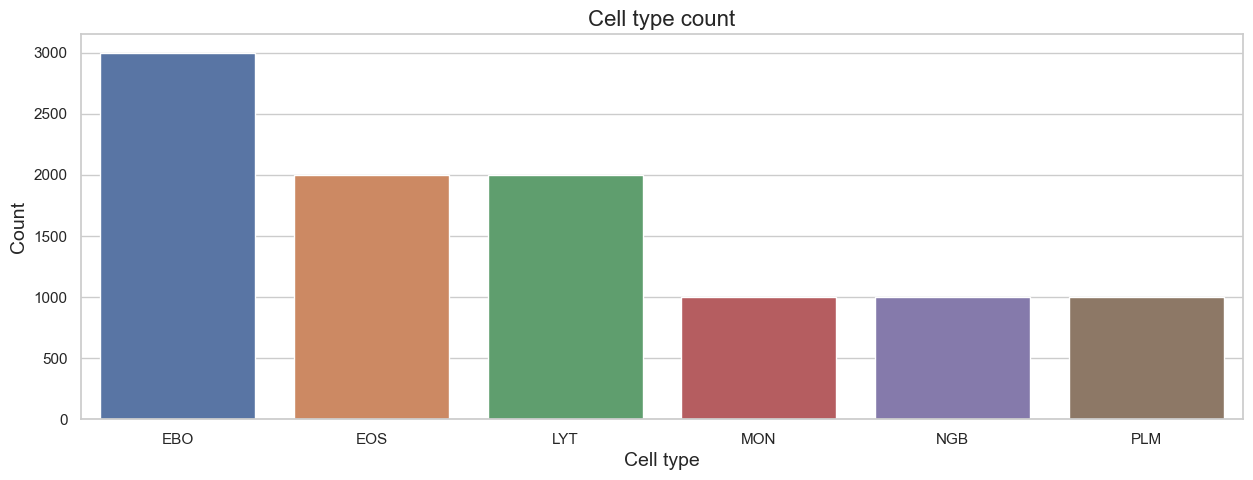

In [7]:
count = [cell_types_list.count(label) for label in labels]

# plot a bar graph
sns.set(style="whitegrid")  # set tyle
plt.figure(figsize=(15, 5))  # set size
sns.barplot(x=labels, y=count)

# set labels
plt.title('Cell type count', fontsize=16)
plt.xlabel('Cell type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [8]:
# converting the images and labels to NumPy arrays
images_array = np.array(images_list)
cell_types_array = np.array(cell_types_list)

print("Images array shape",images_array.shape)
print("Cell type array shape",cell_types_array.shape)

print("image array:",images_array[0])
print("cell type:",cell_types_array[0])

Images array shape (10000, 64, 64, 3)
Cell type array shape (10000,)
image array: [[[ 87  45 154]
  [ 85  45 157]
  [ 90  47 159]
  ...
  [128 125 130]
  [129 124 132]
  [124 122 132]]

 [[ 85  46 158]
  [ 87  47 155]
  [ 90  49 156]
  ...
  [128 126 130]
  [124 124 129]
  [125 124 128]]

 [[ 89  50 157]
  [ 92  52 158]
  [ 88  49 155]
  ...
  [126 124 124]
  [124 123 125]
  [124 124 123]]

 ...

 [[120 123 128]
  [123 123 133]
  [124 121 135]
  ...
  [131 133 140]
  [129 128 137]
  [124 123 137]]

 [[123 128 146]
  [127 124 146]
  [127 124 148]
  ...
  [135 135 138]
  [134 131 141]
  [129 127 141]]

 [[135 141 148]
  [131 135 149]
  [134 138 151]
  ...
  [137 135 142]
  [130 132 142]
  [131 132 141]]]
cell type: EBO


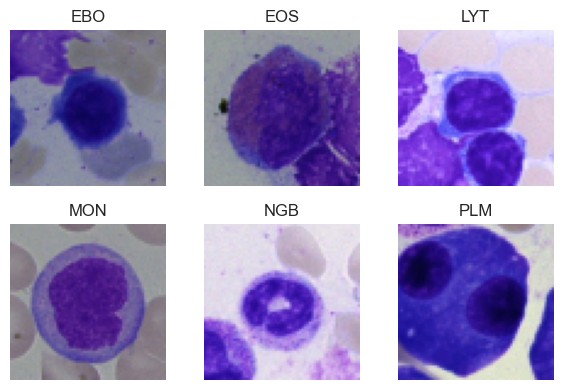

In [9]:
# display image of unique cell
total = [preprocess_data('bone_marrow_cell_dataset/EBO/0001-1000/EBO_00001.jpg'),
         preprocess_data('bone_marrow_cell_dataset/EOS/0001-1000/EOS_00001.jpg'),
         preprocess_data('bone_marrow_cell_dataset/LYT/0001-1000/LYT_00001.jpg'),
         preprocess_data('bone_marrow_cell_dataset/MON/0001-1000/MON_00001.jpg'),
         preprocess_data('bone_marrow_cell_dataset/NGB/0001-1000/NGB_00001.jpg'),
         preprocess_data('bone_marrow_cell_dataset/PLM/0001-1000/PLM_00001.jpg')]
plt.figure(figsize=(6, 6))
for i, each in enumerate(labels):
    plt.subplot(3, 3, i+1)
    plt.imshow(total[i])
    plt.title(each)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# perform one-hot encoding on cell types
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(cell_types_array)
cell_type = to_categorical(labels_encoded, num_classes=21)

In [11]:
# split the data into training and testing sets with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(images_array, cell_type, test_size=0.2, random_state=42)

# Approach 1: CNN model

In [12]:
# define cnn model using keras sequantial api
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64, 3))) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))

model.add(Dense (21, activation = 'softmax'))  # 21: cell types

In [13]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [14]:
# compile model for multiclass classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# define the path to save the best model
model_checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [16]:
# train model for 10 epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 2.9523 - accuracy: 0.4339
Epoch 1: val_accuracy improved from -inf to 0.55850, saving model to model.h5
250/250 [==============================] - 38s 141ms/step - loss: 2.9523 - accuracy: 0.4339 - val_loss: 1.1943 - val_accuracy: 0.5585
Epoch 2/10


C:\Users\Kaswala\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - ETA: 0s - loss: 1.1859 - accuracy: 0.5573
Epoch 2: val_accuracy improved from 0.55850 to 0.58850, saving model to model.h5
250/250 [==============================] - 36s 144ms/step - loss: 1.1859 - accuracy: 0.5573 - val_loss: 1.1135 - val_accuracy: 0.5885
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 1.0506 - accuracy: 0.6174
Epoch 3: val_accuracy improved from 0.58850 to 0.62650, saving model to model.h5
250/250 [==============================] - 37s 146ms/step - loss: 1.0506 - accuracy: 0.6174 - val_loss: 1.0327 - val_accuracy: 0.6265
Epoch 4/10
250/250 [==============================] - ETA: 0s - loss: 0.9457 - accuracy: 0.6555
Epoch 4: val_accuracy improved from 0.62650 to 0.66250, saving model to model.h5
250/250 [==============================] - 34s 136ms/step - loss: 0.9457 - accuracy: 0.6555 - val_loss: 0.9564 - val_accuracy: 0.6625
Epoch 5/10
250/250 [==============================] - ETA: 0s - loss: 0.8672 -

In [17]:
model.save("bone_marrow_cnn_model.h5")

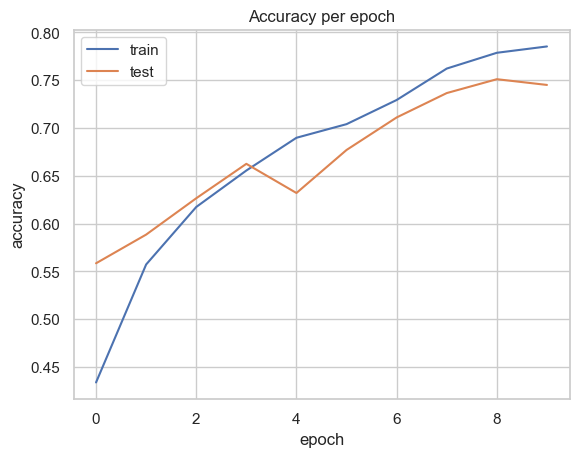

In [18]:
# visuals of accuracy throughout epochs
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy per epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [19]:
# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss during: {loss:.4f}')
print(f'Model accuracy: {accuracy:.4f}')

63/63 [==============================] - 3s 41ms/step - loss: 0.7661 - accuracy: 0.7450
Loss during: 0.7661
Model accuracy: 0.7450


In [20]:
# load the saved model while making checkoint
model_path = 'model.h5'
loaded_model = load_model(model_path)

# perform predictions on test set
predicted = loaded_model.predict(X_test)

# convert predictions to class labels
predicted_cnn_cells = label_encoder.inverse_transform(np.argmax(predicted, axis=1))

# convert one-hot encoded true labels to class labels
true_cnn_cells = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

63/63 [==============================] - 3s 37ms/step


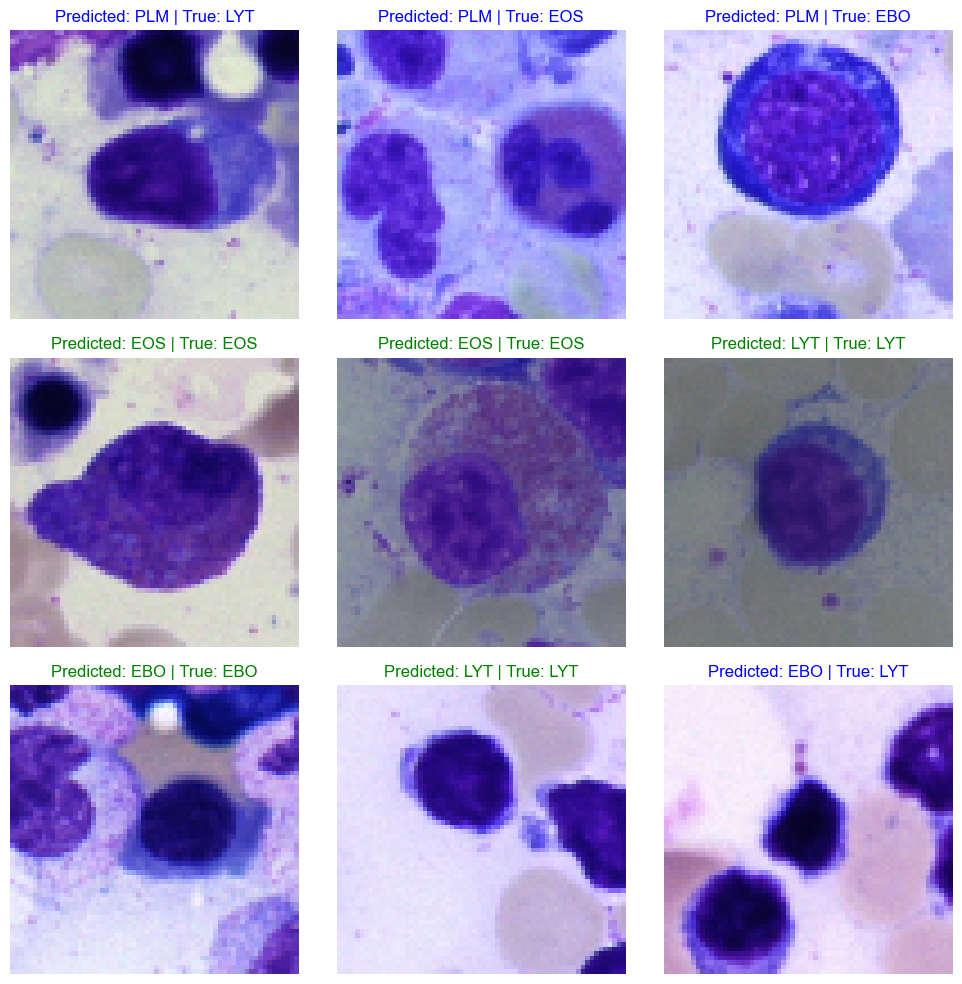

In [21]:
# plotting predicted results
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    if predicted_cnn_cells[i] == true_cnn_cells[i]:
        title_color = 'green'  # true prediction
    else:
        title_color = 'blue'  # false prediction
    plt.title(f'Predicted: {predicted_cnn_cells[i]} | True: {true_cnn_cells[i]}', color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()

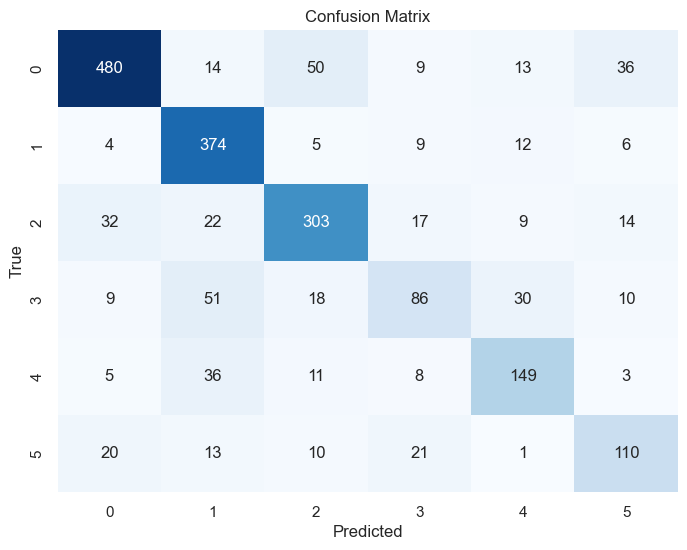

In [23]:
confusion = confusion_matrix(true_cnn_cells, predicted_cnn_cells)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Approach 2: ResNet

In [24]:
X = images_array # features(image array)
y = cell_type # target(cell type)

In [25]:
# split data into training and testing by 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# calling pre-rained 50-layer ResNet 
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [27]:
# build this dataset's training model on resnet
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# train model
resnet_model = model.fit(X_train, y_train, epochs=5, batch_size=300, validation_data=(X_test, y_test))

Epoch 1/5
27/27 [==============================] - 360s 13s/step - loss: 0.2120 - accuracy: 0.9370 - val_loss: 0.6652 - val_accuracy: 0.8185
Epoch 2/5
27/27 [==============================] - 353s 13s/step - loss: 0.1022 - accuracy: 0.9684 - val_loss: 0.6497 - val_accuracy: 0.8225
Epoch 3/5
27/27 [==============================] - 351s 13s/step - loss: 0.0776 - accuracy: 0.9771 - val_loss: 0.6587 - val_accuracy: 0.8385
Epoch 4/5
27/27 [==============================] - 350s 13s/step - loss: 0.0715 - accuracy: 0.9797 - val_loss: 0.5803 - val_accuracy: 0.8580
Epoch 5/5
27/27 [==============================] - 351s 13s/step - loss: 0.0453 - accuracy: 0.9847 - val_loss: 0.5895 - val_accuracy: 0.8710


In [33]:
model.save("bone_marrow_resnet_model.h5")  # save model

C:\Users\Kaswala\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


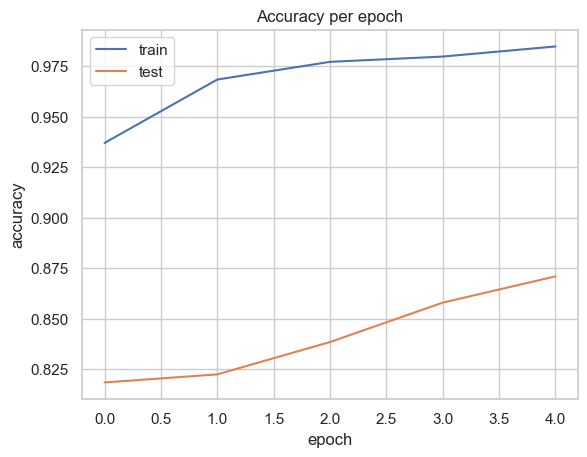

In [40]:
# visuals of accuracy throughout epochs
plt.plot(resnet_model.history['accuracy']) 
plt.plot(resnet_model.history['val_accuracy'])
plt.title("Accuracy per epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [41]:
# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss during: {loss:.4f}')
print(f'Model accuracy: {accuracy:.4f}')

63/63 [==============================] - 13s 213ms/step - loss: 0.5895 - accuracy: 0.8710
Loss during: 0.5895
Model accuracy: 0.8710


In [42]:
# load the saved model while making checkoint
model_path = 'bone_marrow_resnet_model.h5'
loaded_model = load_model(model_path)

# perform predictions on test set
predicted = loaded_model.predict(X_test)

# convert predictions to class labels
predicted_resnet_cells = label_encoder.inverse_transform(np.argmax(predicted, axis=1))

# convert one-hot encoded true labels to class labels
true_resnet_cells = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

63/63 [==============================] - 14s 203ms/step


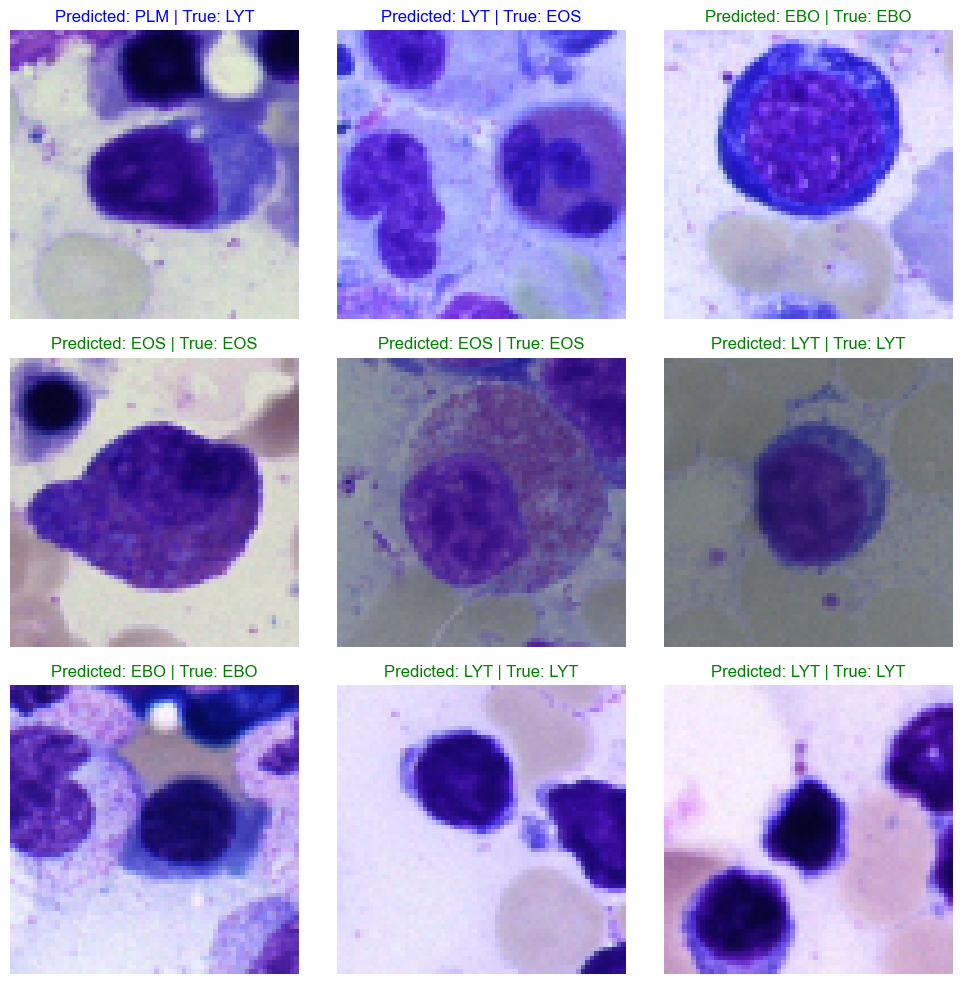

In [43]:
# plotting predicted results
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    if predicted_resnet_cells[i] == true_resnet_cells[i]:
        title_color = 'green'  # true prediction
    else:
        title_color = 'blue'  # false prediction
    plt.title(f'Predicted: {predicted_resnet_cells[i]} | True: {true_resnet_cells[i]}', color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()

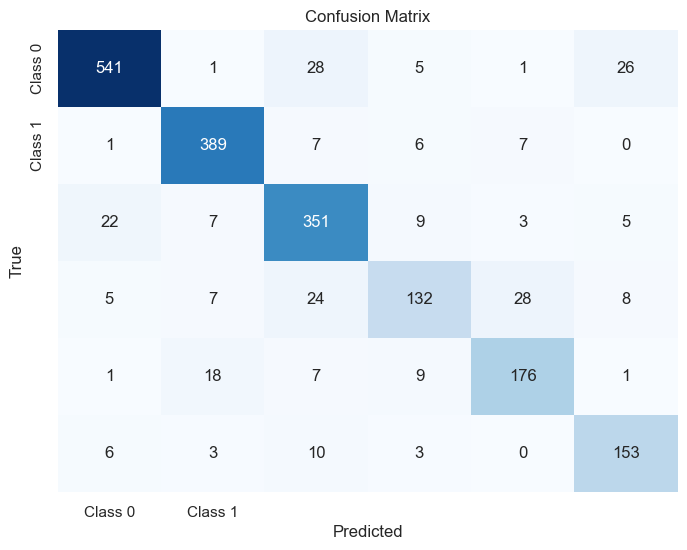

In [44]:
confusion = confusion_matrix(true_resnet_cells, predicted_resnet_cells)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# comparison between two models

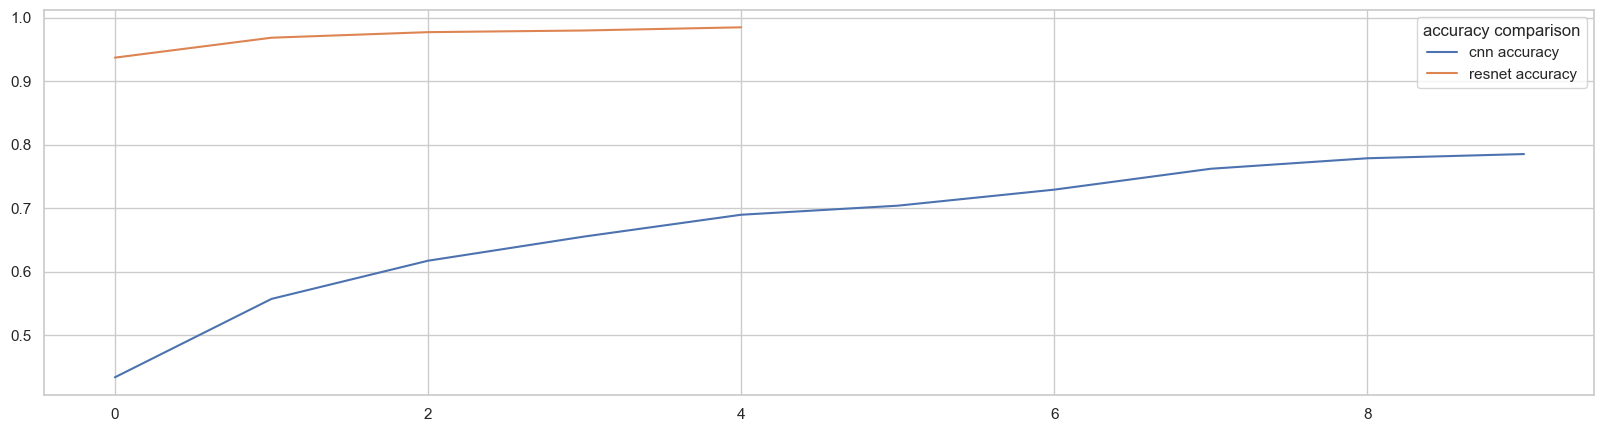

In [46]:
# accuracy comparison
plt.figure(figsize=(20,5))
plt.plot(history.history['accuracy'], label = "cnn accuracy")
plt.plot(resnet_model.history['accuracy'], label = "resnet accuracy")
plt.legend(title = "accuracy comparison")
plt.show()

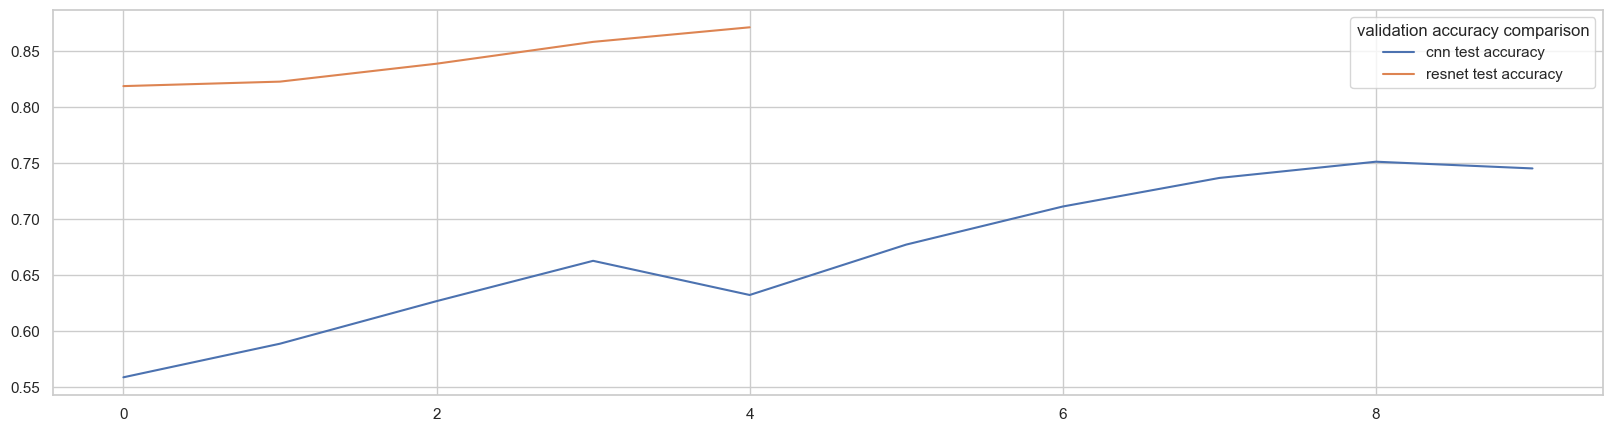

In [47]:
# validation accuracy comparison
plt.figure(figsize=(20,5))
plt.plot(history.history['val_accuracy'], label = "cnn test accuracy")
plt.plot(resnet_model.history['val_accuracy'], label = "resnet test accuracy")
plt.legend(title = "validation accuracy comparison")
plt.show()